Dataset Overview:
       sepal_length  sepal_width  petal_length  petal_width
count    152.000000   152.000000    152.000000   152.000000
mean       5.887500     3.138158      3.829605     1.304605
std        0.908336     0.825739      1.860992     1.187927
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.400000      5.100000     1.800000
max        9.500000     9.500000      9.500000     9.500000

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.305079      0.885818     0.798534
sepal_width       0.305079     1.000000      0.073428     0.533716
petal_length      0.885818     0.073428      1.000000     0.836259
petal_width       0.798534     0.533716      0.836259     1.000000

Pearson Correlation Coefficients:
Sepal Length and Petal Width: 0.7985
Petal Length a

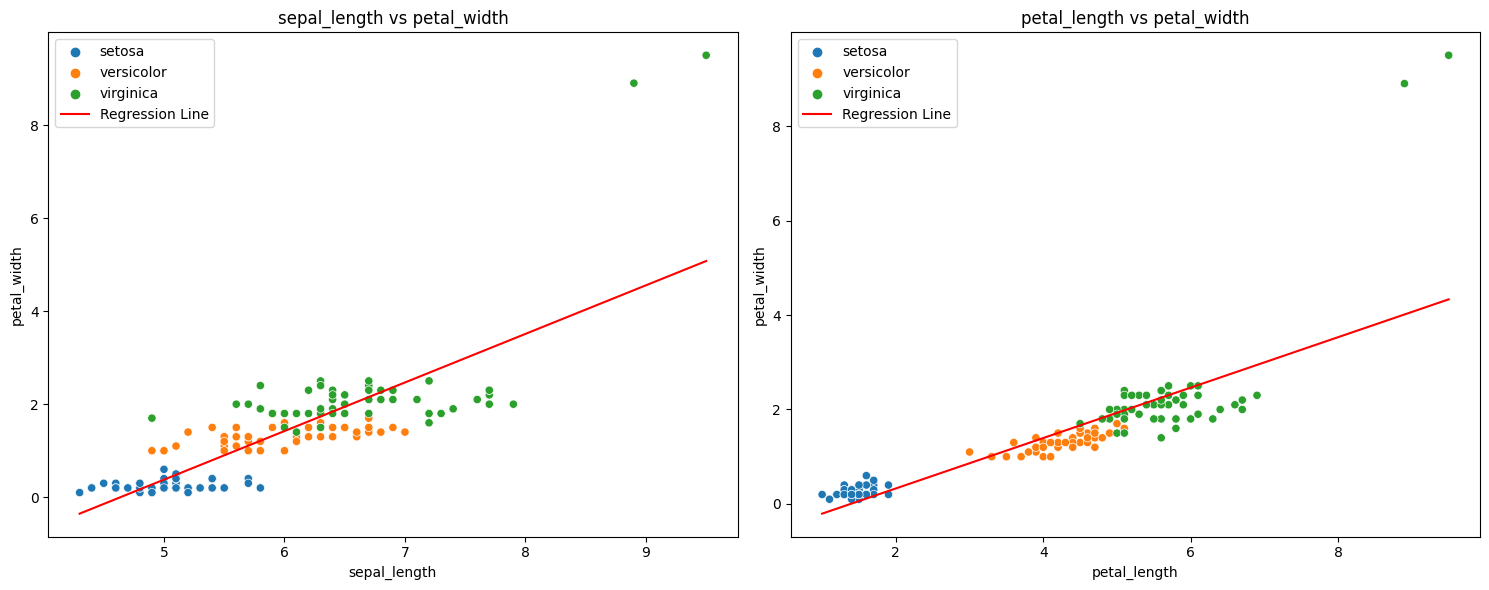


Conclusion: Model 2 (Petal Length vs Petal Width) is better because it has a higher R-squared value.
Model 2 R-squared: 0.6993
Model 1 R-squared: 0.6377
The model with the higher R-squared value explains more of the variance in Petal Width,
indicating a better fit to the data and potentially better predictive power.

This aligns with the correlation coefficients:
Petal Length and Petal Width correlation: 0.8363
Sepal Length and Petal Width correlation: 0.7985
The higher correlation between Petal Length and Petal Width suggests a stronger linear relationship,
which is reflected in the better performance of Model 2.

Mean values by species:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          5.006000     3.428000      1.462000     0.246000
versicolor      5.936000     2.770000      4.260000     1.326000
virginica       6.688462     3.213462      5.692308     2.301923


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Figure size 1200x800 with 0 Axes>

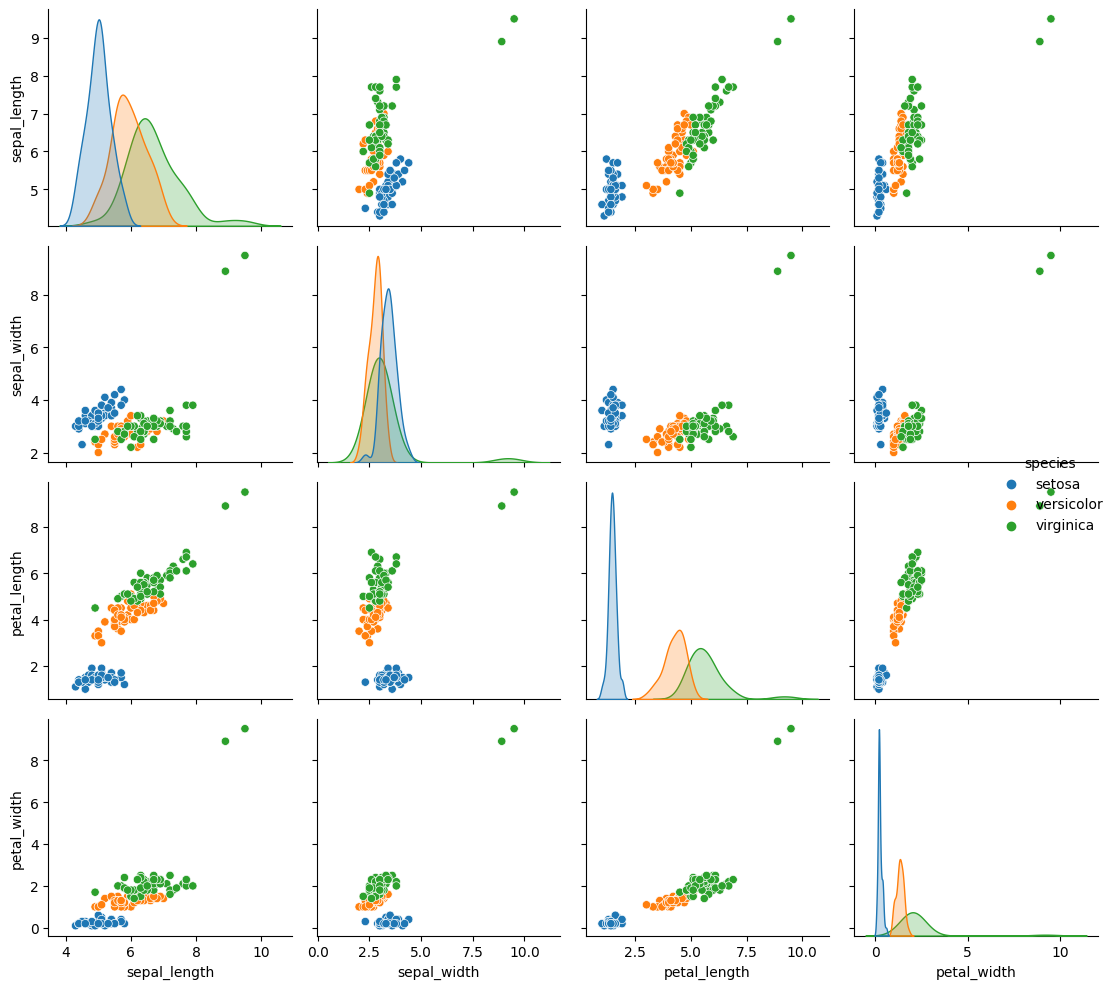

In [11]:
#20I-0565 Faizan Pervaz Stat(B)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def Calc_Pearson(arr1, arr2):
    mean1 = np.mean(arr1)
    mean2 = np.mean(arr2)
    
    numerator = np.sum((arr1 - mean1) * (arr2 - mean2))
    denominator = np.sqrt(np.sum((arr1 - mean1)**2) * np.sum((arr2 - mean2)**2))
    
    return numerator / denominator

def Perform_LR(x_values, y_values):
    mean_x = np.mean(x_values)
    mean_y = np.mean(y_values)
    
    num = np.sum((x_values - mean_x) * (y_values - mean_y))
    denom = np.sum((x_values - mean_x)**2)
    slope = num / denom
    
    intercept = mean_y - slope * mean_x
    
    predictions = slope * x_values + intercept
    total_variance = np.sum((y_values - mean_y)**2)
    residual_variance = np.sum((y_values - predictions)**2)
    r_squared = 1 - (residual_variance / total_variance)
    
    return slope, intercept, r_squared

def Read_CSV(filepath):
    df = pd.read_csv(filepath)
    return df

def Visualize_LR(df, x_col, y_col, slope, intercept, ax):
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='species', ax=ax)
    
    x_range = np.linspace(df[x_col].min(), df[x_col].max(), 100)
    y_pred = slope * x_range + intercept
    
    ax.plot(x_range, y_pred, color='red', label='Regression Line')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')
    ax.legend()

def main(filepath):
    df = Read_CSV(filepath)
    if df is None:
        return
    
    print("Dataset Overview:")
    print(df.describe())
    
    numeric_df = df.select_dtypes(include=[np.number])
    print("\nCorrelation Matrix:")
    print(numeric_df.corr())
    
    corr_sepal_length_petal_width = Calc_Pearson(df['sepal_length'], df['petal_width'])
    corr_petal_length_petal_width = Calc_Pearson(df['petal_length'], df['petal_width'])
    
    #2 vvariables relation in them, higher means strong relationship
    print("\nPearson Correlation Coefficients:")
    print(f"Sepal Length and Petal Width: {corr_sepal_length_petal_width:.4f}")
    print(f"Petal Length and Petal Width: {corr_petal_length_petal_width:.4f}")
    
    slope1, intercept1, r_squared1 = Perform_LR(df['sepal_length'], df['petal_width'])
    slope2, intercept2, r_squared2 = Perform_LR(df['petal_length'], df['petal_width'])
    
    print("\nCustom Linear Regression Results:")
    print(f"Model 1 (Sepal Length vs Petal Width) R-squared: {r_squared1:.4f}")
    print(f"Model 2 (Petal Length vs Petal Width) R-squared: {r_squared2:.4f}")
    
    # Visualize results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    Visualize_LR(df, 'sepal_length', 'petal_width', slope1, intercept1, ax1)
    Visualize_LR(df, 'petal_length', 'petal_width', slope2, intercept2, ax2)
    
    plt.tight_layout()
    plt.show()
    
    better_model = "Model 2 (Petal Length vs Petal Width)" if r_squared2 > r_squared1 else "Model 1 (Sepal Length vs Petal Width)"
    print(f"\nConclusion: {better_model} is better because it has a higher R-squared value.")
    print(f"Model 2 R-squared: {r_squared2:.4f}")
    print(f"Model 1 R-squared: {r_squared1:.4f}")
    print("The model with the higher R-squared value explains more of the variance in Petal Width,")
    print("indicating a better fit to the data and potentially better predictive power.")
    print("\nThis aligns with the correlation coefficients:")
    print(f"Petal Length and Petal Width correlation: {corr_petal_length_petal_width:.4f}")
    print(f"Sepal Length and Petal Width correlation: {corr_sepal_length_petal_width:.4f}")
    print("The higher correlation between Petal Length and Petal Width suggests a stronger linear relationship,")
    print("which is reflected in the better performance of Model 2.")

    print("\nMean values by species:")
    print(df.groupby('species').mean())

    plt.figure(figsize=(12, 8))
    sns.pairplot(df, hue='species')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    filepath = 'iris2.csv'  
    main(filepath)
